In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train = pd.read_csv('train_val.csv')

# Data Overview

In [5]:
train.head()

,ID,tweet,labels
0,1296010336907038720t,@cath__kath AstraZeneca is made with the kidne...,ingredients
1,1336808189677940736t,It begins. Please find safe alternatives to th...,side-effect
2,1329488407307956231t,"@PaolaQP1231 Well, I mean congratulations Covi...",side-effect
3,1364194604459900934t,@BorisJohnson for those of us that do not wish...,mandatory
4,1375938799247765515t,She has been trying to speak out: writing lett...,side-effect rushed


In [6]:
train.shape

(9921, 3)

In [20]:
#train.labels.nunique()

In [21]:
#train.groupby(['labels'])['ID'].count().sort_values(ascending= False)

In [30]:
#train.groupby(['labels'])['ID'].count().sort_values(ascending= False)[0:11]

In [7]:
train.isna().sum()

ID        0
tweet     0
labels    0
dtype: int64

# Label Distribution

In [8]:
# Define a function to split the words
def split_words(row):
    return row.split(' ')

In [9]:
train['label_list'] = train['labels'].apply(split_words)

In [10]:
train.head()

,ID,tweet,labels,label_list
0,1296010336907038720t,@cath__kath AstraZeneca is made with the kidne...,ingredients,[ingredients]
1,1336808189677940736t,It begins. Please find safe alternatives to th...,side-effect,[side-effect]
2,1329488407307956231t,"@PaolaQP1231 Well, I mean congratulations Covi...",side-effect,[side-effect]
3,1364194604459900934t,@BorisJohnson for those of us that do not wish...,mandatory,[mandatory]
4,1375938799247765515t,She has been trying to speak out: writing lett...,side-effect rushed,"[side-effect, rushed]"


In [11]:
train.explode(['label_list']).groupby(['label_list'])['ID'].count().sort_values(ascending= False)

label_list
side-effect    3805
ineffective    1672
rushed         1477
pharma         1273
mandatory       783
unnecessary     722
none            629
political       626
conspiracy      487
ingredients     436
country         201
religious        64
Name: ID, dtype: int64

In [12]:
train['label_len'] = train['label_list'].apply(len)

In [14]:
train.groupby(['label_len'])['ID'].count()

label_len
1    7936
2    1716
3     269
Name: ID, dtype: int64

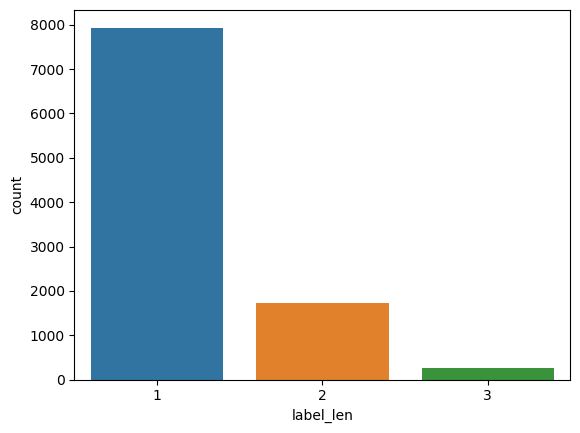

In [12]:
sns.countplot(train['label_len'])
plt.show()

In [42]:
# Select 10 random rows
random_rows = train['tweet'].sample(n=10)

for row in random_rows:
    print('------------')
    print(row)

------------
@librtyisanarchy @cw3263 @NPR @pfizer Realistically there has never been a vaccine that was perfectly 100 percent effective. Notice how they only did this on a few thousand people at best. They basically did the same thing on their previous trials. With no long term health trials either. I ain't taking it.
------------
@RealJamesWoods I don’t understand why the media is going nuts over Trump mentioning the injection of disinfectants? I guess they haven’t done their homework to know that a lot of the already approved FDA vaccines for things other than Covid-19 have disinfectants included in their formulation. https://t.co/BVvHtAbXmi
------------
In science we trust... 'Those who don’t know #Pfizer’s checkered history may wish to learn something about the company’s recent criminal and civil crimes, especially as the company’s Covid vaccine promotion is set for a warp speed rollout.' #vaccine https://t.co/ojSCNmRVuQ
------------
@TooSoon51705384 ...and "Pfizer said the vaccin

# Tweet Length

In [12]:
train['tweet_len'] = train['tweet'].apply(lambda x: len(x.split()))

In [13]:
train.head()

,ID,tweet,labels,label_list,label_len,tweet_len
0,1296010336907038720t,@cath__kath AstraZeneca is made with the kidne...,ingredients,[ingredients],1,17
1,1336808189677940736t,It begins. Please find safe alternatives to th...,side-effect,[side-effect],1,24
2,1329488407307956231t,"@PaolaQP1231 Well, I mean congratulations Covi...",side-effect,[side-effect],1,49
3,1364194604459900934t,@BorisJohnson for those of us that do not wish...,mandatory,[mandatory],1,55
4,1375938799247765515t,She has been trying to speak out: writing lett...,side-effect rushed,"[side-effect, rushed]",2,42


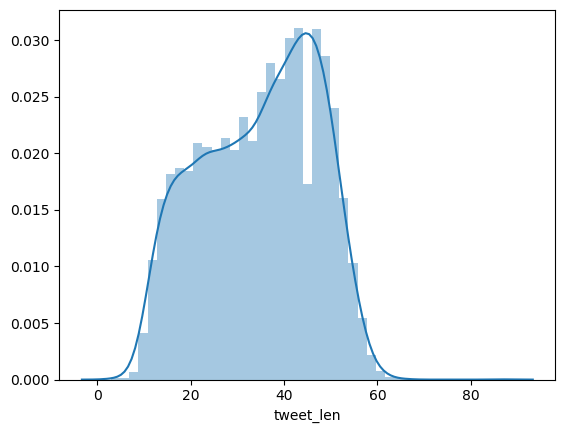

In [15]:
sns.distplot(train['tweet_len'])
plt.show()

## Are longer tweets associated with certain labels more than others?

In [16]:
train.explode(['label_list']).groupby(['label_list'])['tweet_len'].mean().sort_values(ascending = False)

label_list
unnecessary    38.738227
political      38.599042
rushed         38.111036
conspiracy     37.882957
ineffective    37.519737
pharma         36.656716
mandatory      35.975734
ingredients    35.243119
side-effect    34.258344
religious      33.031250
country        31.129353
none           25.817170
Name: tweet_len, dtype: float64

# Word Frequency Analysis

In [17]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import re

In [16]:
# Remove unwanted characters
train['clean_tweets'] = train['tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # remove punctuation
train['clean_tweets'] = train['clean_tweets'].apply(lambda x: re.sub(r'@\w+', '', x))  # remove handles
train['clean_tweets'] = train['clean_tweets'].apply(lambda x: re.sub(r'#\w+', '', x))  # remove hashtags
train['clean_tweets'] = train['clean_tweets'].apply(lambda x: re.sub(r'&\w+', '', x))  # remove words starting with &

In [17]:
# Convert to lowercase
train['clean_tweets'] = train['clean_tweets'].str.lower()

# Tokenize the tweets
train['tokens'] = train['clean_tweets'].apply(word_tokenize)

NameError: name 'word_tokenize' is not defined

In [22]:
# You might want to remove stopwords (common words like 'the', 'is', etc. that often don't carry much meaning)
stop_words = set(stopwords.words('english'))

train['tokens'] = train['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

In [23]:
# Group by label, and within each group, concatenate all the token lists together, then count the occurrences of each word
common_words = train.explode(['label_list']).groupby('label_list')['tokens'].sum().apply(lambda tokens: Counter(tokens).most_common(20))

#print(common_words)

In [24]:
for label, words in common_words.items():
    print('------------')
    print(f"Label: {label}")
    for word, count in words:
        print(f"   {word}: {count}")

------------
Label: conspiracy
   vaccine: 423
   covid: 165
   gates: 112
   people: 103
   vaccines: 84
   covid19: 83
   virus: 73
   pfizer: 71
   world: 68
   get: 67
   bill: 65
   moderna: 62
   us: 55
   take: 53
   corona: 46
   one: 45
   dont: 45
   population: 44
   dna: 44
   like: 43
------------
Label: country
   vaccine: 248
   russian: 88
   chinese: 52
   take: 38
   covid: 31
   covid19: 27
   dont: 27
   us: 24
   china: 24
   would: 23
   like: 23
   get: 22
   vaccines: 22
   im: 21
   trust: 19
   even: 19
   russia: 19
   one: 18
   people: 17
   taking: 17
------------
Label: ineffective
   vaccine: 1863
   covid: 559
   pfizer: 383
   vaccines: 315
   people: 303
   get: 288
   effective: 282
   virus: 280
   vaccinated: 222
   still: 213
   dont: 211
   covid19: 208
   flu: 187
   even: 179
   efficacy: 179
   one: 176
   doesnt: 164
   getting: 157
   work: 153
   know: 148
------------
Label: ingredients
   vaccine: 447
   vaccines: 99
   covid: 89
   pfize

# Co-occurance of Labels

In [25]:
from sklearn.preprocessing import MultiLabelBinarizer

In [26]:
# Convert lists of labels into a binary matrix
mlb = MultiLabelBinarizer()
labels_matrix = mlb.fit_transform(train['label_list'])

In [27]:
# Convert binary matrix into a DataFrame
labels_df = pd.DataFrame(labels_matrix, columns=mlb.classes_)

In [28]:
# Compute co-occurrence matrix
co_occurrence_matrix = labels_df.T.dot(labels_df)

In [29]:
print(co_occurrence_matrix)

             conspiracy  country  ineffective  ingredients  mandatory  none  \
conspiracy          487        7           14           79         27     0   
country               7      201           15            2          5     0   
ineffective          14       15         1672           19         35     0   
ingredients          79        2           19          436         20     0   
mandatory            27        5           35           20        783     0   
none                  0        0            0            0          0   629   
pharma               97        5           51           23         29     0   
political            34       12           18            8         37     0   
religious             5        1            0           17          4     0   
rushed               26       23          112           28         58     0   
side-effect         116       17          182          101         71     0   
unnecessary          32        4           78       

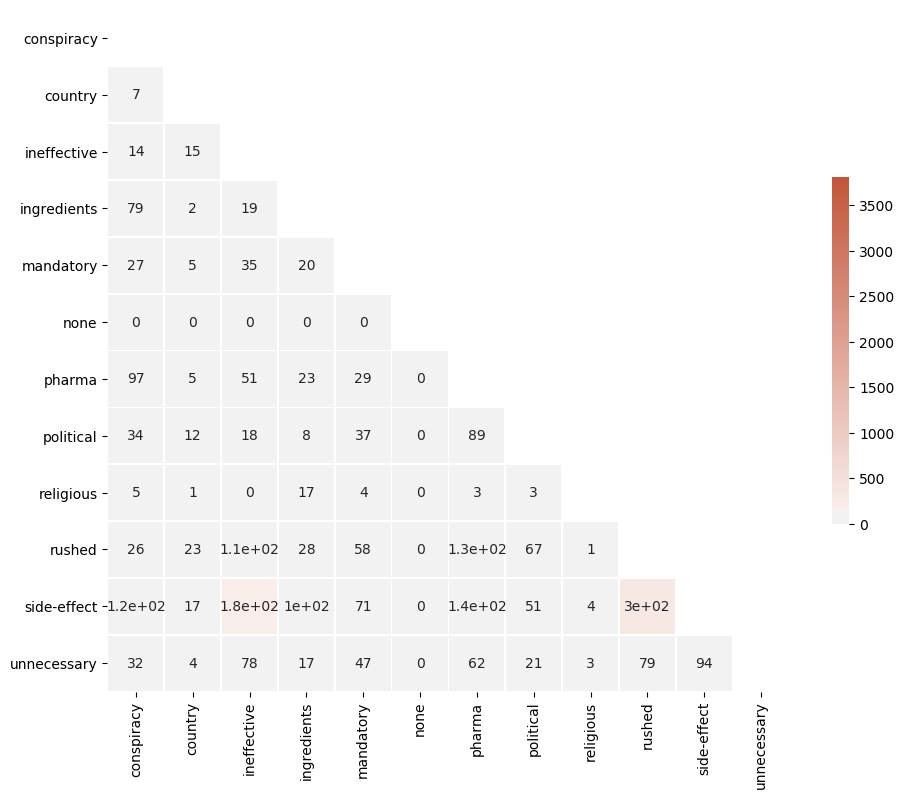

In [30]:
mask = np.triu(np.ones_like(co_occurrence_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(co_occurrence_matrix, mask=mask, cmap=cmap, vmax=None, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

# Sentiment Analysis

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [32]:
# Download the vader_lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
# Assuming df is your DataFrame and 'tweets' is the column with the text of the tweets
train['sentiment_scores'] = train['tweet'].apply(lambda tweet: sia.polarity_scores(tweet))

# You can split the dictionary of scores into separate columns
train = pd.concat([train.drop(['sentiment_scores'], axis=1), train['sentiment_scores'].apply(pd.Series)], axis=1)

In [34]:
# 'neg' for negative sentiment, 'neu' for neutral sentiment, 'pos' for positive sentiment, and 'compound' for the aggregated sentiment.

# The sentiment scores range from -1 to 1 for 'compound' (where -1 is extremely negative and 1 is extremely positive), and 
# 0 to 1 for 'neg', 'neu', and 'pos' (which add up to 1). 

In [36]:
train.head()

,ID,tweet,labels,label_list,label_len,tweet_len,clean_tweets,tokens,neg,neu,pos,compound
0,1296010336907038720t,@cath__kath AstraZeneca is made with the kidne...,ingredients,[ingredients],1,17,cath__kath astrazeneca is made with the kidney...,"[cath__kath, astrazeneca, made, kidney, cells,...",0.000,1.000,0.000,0.0000
1,1336808189677940736t,It begins. Please find safe alternatives to th...,side-effect,[side-effect],1,24,it begins please find safe alternatives to thi...,"[begins, please, find, safe, alternatives, vac...",0.171,0.658,0.171,0.0000
2,1329488407307956231t,"@PaolaQP1231 Well, I mean congratulations Covi...",side-effect,[side-effect],1,49,paolaqp1231 well i mean congratulations covid1...,"[paolaqp1231, well, mean, congratulations, cov...",0.027,0.856,0.117,0.6808
3,1364194604459900934t,@BorisJohnson for those of us that do not wish...,mandatory,[mandatory],1,55,borisjohnson for those of us that do not wish ...,"[borisjohnson, us, wish, vaccine, given, vacci...",0.038,0.834,0.128,0.7385
4,1375938799247765515t,She has been trying to speak out: writing lett...,side-effect rushed,"[side-effect, rushed]",2,42,she has been trying to speak out writing lette...,"[trying, speak, writing, letters, government, ...",0.097,0.903,0.000,-0.4939


In [35]:
average_sentiment = train.explode(['label_list']).groupby('label_list')['compound'].mean()

print(average_sentiment)

label_list
conspiracy    -0.152121
country       -0.027262
ineffective   -0.050121
ingredients   -0.096524
mandatory     -0.098390
none          -0.057131
pharma        -0.047567
political     -0.125577
religious     -0.180167
rushed        -0.051898
side-effect   -0.265099
unnecessary   -0.113949
Name: compound, dtype: float64


In [37]:
train.to_csv('train_modified.csv')

In [49]:
train_modified = pd.read_csv('train_modified.csv')

In [50]:
train_modified.shape

(9921, 13)

In [51]:
from sklearn.model_selection import train_test_split

# Assuming df is your original DataFrame

# Split the DataFrame into train and validation sets
train_df, val_df = train_test_split(train_modified, test_size=0.2, random_state=42)

# Print the number of rows in each set
print("Train set size:", len(train_df))
print("Validation set size:", len(val_df))

Train set size: 7936
Validation set size: 1985


In [52]:
train_df.to_csv('train_df.csv')
val_df.to_csv('val_df.csv')

In [53]:
train_df.head()

,Unnamed: 0,ID,tweet,labels,label_list,label_len,tweet_len,clean_tweets,tokens,neg,neu,pos,compound
1477,1477,1352994869556350977t,#TRUSTCCP? Do you trust the Chinese Communist ...,country,['country'],1,32,trustccp do you trust the chinese communist pa...,"['trustccp', 'trust', 'chinese', 'communist', ...",0.035,0.679,0.286,0.8738
1790,1790,1364574998397132805t,@hannah62687 @mgtalbott @DrTomFrieden For many...,ineffective unnecessary,"['ineffective', 'unnecessary']",2,50,hannah62687 mgtalbott drtomfrieden for many ge...,"['hannah62687', 'mgtalbott', 'drtomfrieden', '...",0.139,0.756,0.105,-0.2295
2615,2615,1334085299945807873t,Imagine if the covid vaccine has a side effect...,side-effect,['side-effect'],1,17,imagine if the covid vaccine has a side effect...,"['imagine', 'covid', 'vaccine', 'side', 'effec...",0.000,1.000,0.000,0.0000
6969,6969,1321645107183980544t,"@GreyHaired07 and yet, every other year we are...",mandatory,['mandatory'],1,31,greyhaired07 and yet every other year we are r...,"['greyhaired07', 'yet', 'every', 'year', 'remi...",0.151,0.849,0.000,-0.5859
7172,7172,1432922183337066498t,#VAERS 17y♂️#Pfizer #Covidvaccine #Suicide att...,side-effect,['side-effect'],1,45,vaers 17ypfizer covidvaccine suicide attempt p...,"['vaers', '17ypfizer', 'covidvaccine', 'suicid...",0.092,0.857,0.051,-0.4588


# Baseline Model

## tf-idf 

In [54]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string

In [55]:
# Text pre-processing
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from text
    #text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'\@\w+','', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase to maintain consistency
    text = text.lower()
    return text

In [56]:
train_df['tweet'] = train_df['tweet'].apply(preprocess_text)
val_df['tweet'] = val_df['tweet'].apply(preprocess_text)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
train_df.head()

,Unnamed: 0,ID,tweet,labels,label_list,label_len,tweet_len,clean_tweets,tokens,neg,neu,pos,compound
1477,1477,1352994869556350977t,trustccp do you trust the chinese communist pa...,country,['country'],1,32,trustccp do you trust the chinese communist pa...,"['trustccp', 'trust', 'chinese', 'communist', ...",0.035,0.679,0.286,0.8738
1790,1790,1364574998397132805t,for many getting severe covid was already a...,ineffective unnecessary,"['ineffective', 'unnecessary']",2,50,hannah62687 mgtalbott drtomfrieden for many ge...,"['hannah62687', 'mgtalbott', 'drtomfrieden', '...",0.139,0.756,0.105,-0.2295
2615,2615,1334085299945807873t,imagine if the covid vaccine has a side effect...,side-effect,['side-effect'],1,17,imagine if the covid vaccine has a side effect...,"['imagine', 'covid', 'vaccine', 'side', 'effec...",0.000,1.000,0.000,0.0000
6969,6969,1321645107183980544t,and yet every other year we are reminded ever...,mandatory,['mandatory'],1,31,greyhaired07 and yet every other year we are r...,"['greyhaired07', 'yet', 'every', 'year', 'remi...",0.151,0.849,0.000,-0.5859
7172,7172,1432922183337066498t,vaers 17y♂️pfizer covidvaccine suicide attempt...,side-effect,['side-effect'],1,45,vaers 17ypfizer covidvaccine suicide attempt p...,"['vaers', '17ypfizer', 'covidvaccine', 'suicid...",0.092,0.857,0.051,-0.4588


In [57]:
# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [58]:
# Fit and transform the vectorizer on the train set, and only transform the vectorizer on the test set
tfidf_train = tfidf_vectorizer.fit_transform(train_df['tweet']) 
tfidf_test = tfidf_vectorizer.transform(val_df['tweet'])

In [59]:
# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names()

In [33]:
# Sum tfidf frequency of each term through documents
sums = tfidf_train.sum(axis=0)

# Connecting term and sum frequency
data = []
for col, term in enumerate(feature_names):
    data.append( (term, sums[0,col] ))

In [34]:
ranking = pd.DataFrame(data, columns=['term','rank'])
print(ranking.sort_values('rank', ascending=False))

            term        rank
3663       covid  225.916205
10403     pfizer  187.450874
10324     people  168.070074
3667     covid19  139.466598
14712   vaccines  139.198034
...          ...         ...
674         6mon    0.156619
25           025    0.156619
9218   multidose    0.156619
1757       avian    0.153288
6503        h5n1    0.153288

[15616 rows x 2 columns]


In [60]:
import ast

y_train = train_df['label_list'].apply(ast.literal_eval)
y_test = val_df['label_list'].apply(ast.literal_eval)

In [63]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer

# Binarize the labels for multi-label classification
mlb = MultiLabelBinarizer()
y_train_binarized = mlb.fit_transform(y_train)
y_test_binarized = mlb.transform(y_test)

## Naive Bayes

In [ ]:
# Initialize the OneVsRestClassifier with MultinomialNB
clf = OneVsRestClassifier(MultinomialNB())

# Fit the model
clf.fit(tfidf_train, y_train_binarized)

# Predict the test set
predictions = clf.predict(tfidf_test)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

# Ensure that y_test and predictions are binary arrays
y_test_array = np.array(y_test_binarized)
predictions_array = np.array(predictions)

# Accuracy
print('Accuracy: ', accuracy_score(y_test_array, predictions_array))

# Precision
print('Precision: ', precision_score(y_test_array, predictions_array, average='micro'))

# Recall
print('Recall: ', recall_score(y_test_array, predictions_array, average='micro'))

# F1 score
print('F1 score: ', f1_score(y_test_array, predictions_array, average='micro'))

# Jaccard score
print('Jaccard score: ', jaccard_score(y_test_array, predictions_array, average='micro'))

Accuracy:  0.18841309823677582
Precision:  0.9372197309417041
Recall:  0.16998779991866614
F1 score:  0.28777969018932875
Jaccard score:  0.16807398472054685


In [39]:
mlb.classes_

array(['conspiracy', 'country', 'ineffective', 'ingredients', 'mandatory',
       'none', 'pharma', 'political', 'religious', 'rushed',
       'side-effect', 'unnecessary'], dtype=object)

In [37]:
y_test_array[1]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [38]:
predictions_array[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
val_df.iloc[1]

Unnamed: 0                                                    510
ID                                           1355176268879306752t
tweet            vaccinating young people 40 with 0005 risk fr...
labels                                         pharma unnecessary
label_list                              ['pharma', 'unnecessary']
label_len                                                       2
tweet_len                                                      45
clean_tweets    bbcbreaking vaccinating young people 40 with 0...
tokens          ['bbcbreaking', 'vaccinating', 'young', 'peopl...
neg                                                         0.214
neu                                                         0.722
pos                                                         0.064
compound                                                   -0.759
Name: 510, dtype: object

## DNN + tfidf

In [61]:
!pip install tensorflow

  Using cached tensorflow-2.11.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached grpcio-1.56.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.2 MB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl (22.9 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-3.19.6-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached tensorflow_io_gcs_filesystem-0.32.0-cp37-cp37m-manylinux_2_12_x86_64.many

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define model parameters
input_dim = tfidf_train.shape[1]  # Number of features
num_classes = y_train_binarized.shape[1]  # Number of classes

# Define your model architecture
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='sigmoid'))  # For multi-label classification, we use a sigmoid activation function in the output layer

# Compile your model with loss, optimizer and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Train your model
#history = model.fit(tfidf_train, y_train_binarized, epochs=10, verbose=1, validation_data=(tfidf_test, y_test_binarized))

history = model.fit(tfidf_train.toarray(), y_train_binarized, epochs=5, verbose=1, validation_data=(tfidf_test.toarray(), y_test_binarized))

Epoch 1/5
248/248 [==============================] - 6s 20ms/step - loss: 0.3341 - categorical_accuracy: 0.2713 - val_loss: 0.2554 - val_categorical_accuracy: 0.3824
Epoch 2/5
248/248 [==============================] - 5s 20ms/step - loss: 0.2234 - categorical_accuracy: 0.4723 - val_loss: 0.2097 - val_categorical_accuracy: 0.5053
Epoch 3/5
248/248 [==============================] - 5s 19ms/step - loss: 0.1529 - categorical_accuracy: 0.6528 - val_loss: 0.1937 - val_categorical_accuracy: 0.5506
Epoch 4/5
248/248 [==============================] - 5s 20ms/step - loss: 0.0988 - categorical_accuracy: 0.7693 - val_loss: 0.2023 - val_categorical_accuracy: 0.5617
Epoch 5/5
248/248 [==============================] - 5s 19ms/step - loss: 0.0638 - categorical_accuracy: 0.8309 - val_loss: 0.2191 - val_categorical_accuracy: 0.5662


In [65]:
# Evaluate the model
loss, accuracy = model.evaluate(tfidf_test.toarray(), y_test_binarized, verbose=False)
print(f'Testing Accuracy:  {accuracy}')

Testing Accuracy:  0.5662468671798706


In [66]:
y_pred = model.predict(tfidf_test.toarray(), verbose=False)

In [67]:
y_pred[0]

array([5.3131701e-03, 6.2131113e-04, 4.0739346e-02, 1.5356428e-02,
       3.9116040e-04, 2.6804963e-03, 3.4128907e-01, 4.5793105e-04,
       6.1718043e-04, 2.7871949e-03, 7.3996210e-01, 1.0311567e-01],
      dtype=float32)

In [68]:
y_test_binarized[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [83]:
predictions = (y_pred > 0.2).astype(int)

In [84]:
predictions[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [73]:
print(classification_report(y_test_binarized, predictions, target_names=mlb.classes_)) #threshold 0.4

              precision    recall  f1-score   support

  conspiracy       0.55      0.24      0.34        91
     country       0.62      0.13      0.21        39
 ineffective       0.66      0.56      0.61       342
 ingredients       0.80      0.29      0.43       114
   mandatory       0.74      0.50      0.59       155
        none       0.34      0.17      0.23       115
      pharma       0.61      0.52      0.56       258
   political       0.53      0.17      0.26       110
   religious       1.00      0.23      0.38        13
      rushed       0.74      0.59      0.65       298
 side-effect       0.74      0.80      0.77       764
 unnecessary       0.69      0.39      0.50       160

   micro avg       0.69      0.55      0.61      2459
   macro avg       0.67      0.38      0.46      2459
weighted avg       0.68      0.55      0.59      2459
 samples avg       0.60      0.58      0.57      2459



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
print(classification_report(y_test_binarized, predictions, target_names=mlb.classes_)) #threshold 0.3

              precision    recall  f1-score   support

  conspiracy       0.47      0.29      0.36        91
     country       0.73      0.21      0.32        39
 ineffective       0.63      0.61      0.62       342
 ingredients       0.78      0.38      0.51       114
   mandatory       0.69      0.52      0.59       155
        none       0.31      0.23      0.26       115
      pharma       0.59      0.55      0.57       258
   political       0.49      0.24      0.32       110
   religious       0.60      0.23      0.33        13
      rushed       0.69      0.63      0.66       298
 side-effect       0.72      0.83      0.77       764
 unnecessary       0.65      0.44      0.52       160

   micro avg       0.66      0.59      0.62      2459
   macro avg       0.61      0.43      0.49      2459
weighted avg       0.65      0.59      0.61      2459
 samples avg       0.61      0.62      0.60      2459



In [79]:
print(classification_report(y_test_binarized, predictions, target_names=mlb.classes_)) #threshold 0.2

              precision    recall  f1-score   support

  conspiracy       0.39      0.36      0.38        91
     country       0.69      0.28      0.40        39
 ineffective       0.59      0.66      0.63       342
 ingredients       0.68      0.47      0.56       114
   mandatory       0.61      0.57      0.59       155
        none       0.30      0.32      0.31       115
      pharma       0.55      0.62      0.58       258
   political       0.40      0.33      0.36       110
   religious       0.60      0.23      0.33        13
      rushed       0.62      0.69      0.66       298
 side-effect       0.69      0.86      0.76       764
 unnecessary       0.56      0.49      0.52       160

   micro avg       0.60      0.65      0.62      2459
   macro avg       0.56      0.49      0.51      2459
weighted avg       0.60      0.65      0.62      2459
 samples avg       0.62      0.67      0.62      2459



## Error Analysis

In [44]:
import numpy as np

# get model predictions
y_pred = model.predict(tfidf_test.toarray())

# convert predictions from probabilities to binary 0/1
y_pred_binarized = np.where(y_pred > 0.5, 1, 0)  

# convert binary results back to original class labels
y_pred_labels = mlb.inverse_transform(y_pred_binarized)
y_test_labels = mlb.inverse_transform(y_test_binarized)

# create a new dataframe to compare the actual and predicted labels
df_pred = pd.DataFrame({'tweet': val_df['tweet'], 'actual_labels': y_test_labels, 'predicted_labels': y_pred_labels})

# look at instances where the actual and predicted labels don't match
df_pred[df_pred['actual_labels'] != df_pred['predicted_labels']]

63/63 [==============================] - 0s 4ms/step


,tweet,actual_labels,predicted_labels
4328,this is about been forced to take a hurried ...,"(mandatory, rushed)","(rushed,)"
9033,they tested kids in the trials my daughter ...,"(unnecessary,)","(none,)"
8642,i was not aware when i was a nurse assistin...,"(ingredients,)","(side-effect,)"
7028,the whole truth and nothing but the truth ther...,"(conspiracy, unnecessary)","(conspiracy,)"
3971,she hasnt had the vaccine yetlisten to wh...,"(none,)",()
...,...,...,...
2286,france socialist party senators request mandat...,"(mandatory, political)","(mandatory,)"
6191,is anyone stupid enough to have this injected ...,"(side-effect,)","(conspiracy, pharma)"
5798,fraud and idiocy discovered at astra zeneca ch...,"(pharma,)","(side-effect,)"
3400,look i’m not taking that vaccine especiall...,"(side-effect, unnecessary)","(side-effect,)"


In [45]:
df_pred.shape

(1985, 3)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

# For each class, print confusion matrix and classification report
for i, class_label in enumerate(mlb.classes_):
    print(f"Class: {class_label}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_binarized[:, i], y_pred_binarized[:, i]))
    print("Classification Report:")
    print(classification_report(y_test_binarized[:, i], y_pred_binarized[:, i]))

Class: conspiracy
Confusion Matrix:
[[1883   11]
 [  76   15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1894
           1       0.58      0.16      0.26        91

    accuracy                           0.96      1985
   macro avg       0.77      0.58      0.62      1985
weighted avg       0.94      0.96      0.94      1985

Class: country
Confusion Matrix:
[[1945    1]
 [  37    2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1946
           1       0.67      0.05      0.10        39

    accuracy                           0.98      1985
   macro avg       0.82      0.53      0.54      1985
weighted avg       0.98      0.98      0.97      1985

Class: ineffective
Confusion Matrix:
[[1551   92]
 [ 161  181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94  

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# Let's say you're interested in the class labeled 'class_X'
interested_class = 'religious'

# Create a DataFrame that contains the tweet text, true labels, and predicted labels
df_errors = df_pred[df_pred['actual_labels'] != df_pred['predicted_labels']]

# Check instances where 'class_X' was the true label but the model predicted otherwise
errors_classX_as_true = df_errors[df_errors['actual_labels'].apply(lambda x: interested_class in x)]
print(errors_classX_as_true)

# Check instances where 'class_X' was the predicted label but not the true label
errors_classX_as_predicted = df_errors[df_errors['predicted_labels'].apply(lambda x: interested_class in x)]
print(errors_classX_as_predicted)


                                                  tweet  \
5841  catholic leaders in new orleans and st louis a...   
2183  funny how things allowed when it suits 🙄 “mora...   
2473    i agree cj is abusing his oath of office as ...   
103   vaccine would be against my religion which is ...   
4522   11162020 it’s simply a matter of demonic cont...   
3526  yes we know and just like the vaccine for covi...   
6831   antiechrist threw media making shureeveryone ...   
747   biontech wont be entering into my body my body...   
8216  religious leaders question ethics of oxford un...   
1162  the moderna one also has the nano bots that te...   
7963  johnson  johnson covid vaccine morally wrong c...   
8740   ohhhhh aahhhhhh ohhhhhh antiscience within sc...   
3002  some roman catholic leaders in us call johnson...   

                             actual_labels predicted_labels  
5841              (ingredients, religious)   (ingredients,)  
2183              (ingredients, religious)   (ing

# GPT-4

In [4]:
!pip install openai
!pip install azure-identity

  Using cached openai-0.27.8-py3-none-any.whl (73 kB)

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip
  Using cached azure_identity-1.13.0-py3-none-any.whl (151 kB)
  Using cached azure_core-1.28.0-py3-none-any.whl (185 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.5 MB/s eta 0:00:00ta 0:00:01
  Using cached msal_extensions-1.0.0-py2.py3-none-any.whl (19 kB)
  Using cached PyJWT-2.8.0-py3-none-any.whl (22 kB)
  Using cached portalocker-2.7.0-py2.py3-none-any.whl (15 kB)

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip


In [5]:
import openai
#import tqdm
from openai import openai_object
from azure.identity import ClientSecretCredential
import requests

In [24]:
import time

In [6]:
openai.api_base = "https://labsopenarena.openai.azure.com/"
openai.api_version = '2023-03-15-preview'
openai.api_type = 'azure_ad'
deployment = "gpt-4"

In [154]:
tenant_id = ''
client_id = ''
client_secret = ''
credential = ClientSecretCredential(tenant_id, client_id, client_secret)

In [155]:
response = credential.get_token("https://cognitiveservices.azure.com/.default")
openai.api_key = response.token

Region configured (None) != region detected ('us-east-1')


In [172]:
def gpt_response(row):

    text = row['tweet']
        
    t1 = time.time()
    max_retries = 10
    retries = 0
    
    while retries < max_retries:
        
        try:
            prompt = f'''
            Assign most relevant labels to a social media post (particularly, a tweet) according to the specific concern(s) towards vaccines as expressed by the author of the post.
            Note that a tweet can have more than one label (concern), e.g., a tweet expressing more than 1 different concerns towards vaccines will have more labels.
            
            We consider the following concerns towards vaccines as the labels for this classification task:

            Unnecessary: The tweet indicates vaccines are unnecessary, or that alternate cures are better.

            Mandatory: Against mandatory vaccination — The tweet suggests that vaccines should not be made mandatory.

            Pharma: Against Big Pharma — The tweet indicates that the Big Pharmaceutical companies are just trying to earn money, or the tweet is against such companies in general because of their history.

            Conspiracy: Deeper Conspiracy — The tweet suggests some deeper conspiracy, and not just that the Big Pharma want to make money (e.g., vaccines are being used to track people, COVID is a hoax)

            Political: Political side of vaccines — The tweet expresses concerns that the governments / politicians are pushing their own agenda though the vaccines.

            Country: Country of origin — The tweet is against some vaccine because of the country where it was developed / manufactured

            Rushed: Untested / Rushed Process — The tweet expresses concerns that the vaccines have not been tested properly or that the published data is not accurate.

            Ingredients: Vaccine Ingredients / technology — The tweet expresses concerns about the ingredients present in the vaccines (eg. fetal cells, chemicals) or the technology used (e.g., mRNA vaccines can change your DNA)

            Side-effect: Side Effects / Deaths — The tweet expresses concerns about the side effects of the vaccines, including deaths caused.

            Ineffective: Vaccine is ineffective — The tweet expresses concerns that the vaccines are not effective enough and are useless.

            Religious: Religious Reasons — The tweet is against vaccines because of religious reasons

            None: No specific reason stated in the tweet, or some reason other than the given ones.
            
            tweet text: {text}
            
            Response: list of labels separated by space
            '''
            
            
            response = openai.ChatCompletion.create(
                    engine="gpt-4",
                    messages=[
      {"role": "system", "content": "You are a helpful assitant that will help in providing most relevant labels to a social media post from a list of labels that express significant concern towards the vaccine."},    # write about precision

                        {
        "role": "system",
        "name": "example_user",
        "content":"@LikeTheMountain @kassiekitson Not at all. Honestly. It is a made up invisible enemy. Herd immunity is worldwide, without the vaccine. I am much more afraid of the vaccine imo.",
                        },
                        {
        "role": "system",
        "name": "example_assistant",
        "content": 'Side-effect',
                        },
     {
        "role": "system",
        "name": "example_user",
        "content": '@JustinTrudeau ,@cathmckenna ,@cafreeland ,@erinotoole ,@theJagmeetSingh ,@fordnation , we will not let you play Covid-19 Russian Roulette with a risky and rushed vaccine.',
     },
                        {
        "role": "system",
        "name": "example_assistant",
        "content": 'Side-effect',
                        },
                                               {
        "role": "system",
        "name": "example_user",
        "content": '@pfizer Lol by injecting people with RNA "activators". ðŸ˜‚ðŸ˜‚ðŸ˜‚ðŸ¤¡ðŸ¤¡ðŸ¤¡',
                                               },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Ingredients',
                        },
                                                                    {
        "role": "system",
        "name": "example_user",
        "content": 'Informed consent impossible with the mysterious ingredient in a Pfizer vaccine vial https://t.co/9yQ174zxZ3',
                                               },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Ingredients',
                        },
                        
                                                                {
        "role": "system",
        "name": "example_user",
        "content": 'Big Pharma spent close to 7 Billion euros on lobbying in France...which as we know is utterly corrupted in terms of Covid response: blocked hydroxychloroquine - like all other Western countries - and embraced remdesivir and vaccines. ðŸ¤',
                                               },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Pharma',
                        },
                                                                    {
        "role": "system",
        "name": "example_user",
        "content": 'Just as Moderna was counting itâ€™s profitsâ€¦people still wonâ€™t care. They are convinced vaccine injuries donâ€™t exist..https://t.co/vyAnlHFVJq',
                                               },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Pharma',
                        },
                                                                    {
        "role": "system",
        "name": "example_user",
        "content": '''@davis_bradley1 @andyfurniss @and_kell Probably why the original SARS vaccine, that at least one COVID vaccine is based on, never really worked, as far as I've heard. ðŸ¤·â€â™€ï¸''',
                                               },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Ineffective',
                        },
                                                                                            {
        "role": "system",
        "name": "example_user",
        "content": '''@ProfPCDoherty This doesn't solve the problem of #LongCovid though. We've fallen a long way from COVID-19 vaccines being protective against disease (recall the 95% efficacy of #Pfizer), to now basically conceding that they're pretty much useless for anything except to keep you from dying â˜ ï¸''',                         },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Ineffective',
                        },
                                                                                                              {
        "role": "system",
        "name": "example_user",
        "content": '''@kentlivenews Let's hope Boris Johnson isn't one of those new trainees to stick people with the vaccine. Not a good picture to use.''',
                                                                                                                  },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Political',
                        },
                                                                                                                                 {
        "role": "system",
        "name": "example_user",
        "content": '''@LadyJ_o__0 @viewspotnz A condition of the Pfizer sale, as reported by Clive Palmer an Australian MP, was that before the sale of their vaccine was completed, Pfizer receives full indemnity if anyone is killed or maimed as a result. The govt of the purchasing country would assume full responsibility.''',
                                                                                                                                 },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Political',
                        },
                                                                                                                                                   {
        "role": "system",
        "name": "example_user",
        "content": '''@SimonHamilton @JimAllister WHY is ANYBODY listening to Ian Young ? He sits on the advisory board at AstraZeneca . Conflict of interest as they want to vaccinate EVERYONE. Also look at who owns AstraZeneca , good old kill Bill Gates. Time for him to go.''',
                                                                                                                                                   },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Mandatory',
                        },
                                                                                                                                                                     {
        "role": "system",
        "name": "example_user",
        "content": '''Let me get this Straight? Vaccine Passports while We allow Illegal Aliens to Cross the Border Unvaccinated? @JoeBiden @SpeakerPelosi U are All a Joke. Like it or Not? Americans? Are REBELS''',
        },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Mandatory',
                        },
                                                                                                                                                    {
        "role": "system",
        "name": "example_user",
        "content": '''on jesus they can keep the covid vaccine far away from me ðŸ˜''',
                                                                                                                                                    },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'None',
                        },
                                                                                                                                {
        "role": "system",
        "name": "example_user",
        "content": '''@jo___bot @Birdpoof @1fellswoop7 @HoarseWisperer He received enough doses of vaccine that he likely has sufficient immunity.  My point is that it is not irrational or anti-science to have concerns about vaccines. There is beginning to be a mob mentality against anyone who has such concerns. I wish we could all talk rationally.''',
                                                                                                                                                    },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'None',
                        },
                                                                                                                                                  {
        "role": "system",
        "name": "example_user",
        "content": '@CureVacRNA @GOVUK We not have even your first vaccine and your busy on boosters and vacc2.0 😏 https://t.co/ldsvtHNe43',
                                                                                                                                                  },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'None',
                        },
                                                                                                                                                  {
        "role": "system",
        "name": "example_user",
        "content": "//That's a complete no for now on the Oxford/AstraZeneca vaccine, from Swissmedic (Switzerland's drug regulator).// [HT Hilda]",
                                                                                                                                                  },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'None',
                        },
                                                                                                                                                  {
        "role": "system",
        "name": "example_user",
        "content": '@PetenyiSandor @katka_cseh Your choice, go and get a Chinese vaccine. I will wait for vaccines which are approved by the EU. We will have enough by the summer. Let’s see how much the Chinese actually will deliver, how many people willing to accept it and if Orban can organize mass vaccination. I doubt it.',
                                                                                                                                                  },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Country',
                        },
                                                                                                                                                  {
        "role": "system",
        "name": "example_user",
        "content": "When someone finally makes a vaccine for Covid-19, I hope to goddamn hell it's developed anywhere but in US or in China, because I won't trust it from either source",
                                                                                                                                                  },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Country',
                        },
                                                                                                                                                           {
        "role": "system",
        "name": "example_user",
        "content": "Oxford University coronavirus vaccine has 'ethical concerns', Sydney Archbishops warn followers - ABC News https://t.co/BFnKmznFx9. Here we go again, religion be totally against humanity again. Stuff the backward bastards. Morrison is a cult follower so he will agree",
        },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Religious',
                        },
                                                                                                                          {
        "role": "system",
        "name": "example_user",
        "content": "@JerryAdeyeri Before it was monster energy drink now its Corona vaccine..... i pray that no one close to you will contact it..... but if anyone does, they shouldn't take a vaccine since it is from the devil",
                                                                                                                          },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Religious',
                        },
                                                                                                                                              {
        "role": "system",
        "name": "example_user",
        "content": "@ChristianWalk1r Of course it's about power...a lot of us figured this out from the very beginning. I have a friend in Toronto whose sister works as a nurse and she say there are zero cases of Covid at the moment: so why the vaccine? And who else but the power brokers does this serve??",
                                                                                                                                              },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Unnecessary',
                        },
                                                                                                                                                                {
        "role": "system",
        "name": "example_user",
        "content": '100 PERCENT Ignorant. What the hell.. "It can also be that if they tested positive, they have to wait 90 days so they will have declined during that time,"  Nearly 200 San Diego Fire-Rescue personnel decline COVID-19 vaccine  https://t.co/Nab5T1gIk4',
        },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Unnecessary',
                        },
                                                                                                                                                                                      {
        "role": "system",
        "name": "example_user",
        "content": '@WarTimeGirl To have 90%+ corona virus efficacy rate. It had to be an advanced vaccine (Nobel prize level). mRNA has me concerned, bc tells cells what DNA to make (or not). I want to read the full published phase 3 study paper with pharmacology, methodology & stats before considering it.',
        },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Rushed',
                        },
                                                                                                                                                                                                              {
        "role": "system",
        "name": "example_user",
        "content": "#RussianVaccine It's not even a vaccine proper trails ain't even done they used it to boost immunity don't know why people are saying they have got a vaccine even coronil of Patanjali was a immunity booster not a vaccine",
        },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Rushed',
                        },
                                                                                                                                                                                                                                {
        "role": "system",
        "name": "example_user",
        "content": '@ConwayRober @BornLondoner @DPJHodges You need to hurry up & wonder a bit quicker & start believing your eyes & ears. Here are Answers: WEF-Great Reset UN Agenda 21/Agenda 2030 Depopulation through mandatory vaccine Kill the old & ill to breed a smaller/stronger population Assess how far people will go (masks)',
        },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Conspiracy',
                        },
                                                                                                                                                                                                                                {
        "role": "system",
        "name": "example_user",
        "content": 'FORMER GATES FOUNDATION VACCINE SCIENTIST CALLS FOR HALT TO VACCINATIONS, PREDICTS “WIPE OUT” OF POPULATIONS https://t.co/DLIDZ1O532',
        },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Conspiracy',
                        },
                        
                                                                                                                                                                                                                                                {
        "role": "system",
        "name": "example_user",
        "content": 'Canadians who received AstraZeneca vaccine excluded from seeing Bruce Springsteen, as Broadway opens up https://t.co/DODZqD9uXy via @ctvottawa people are against aztrasenaca but Dr. Bonnie Henry stands by all vaccines all are safe seems they have no idea if they are or not folks',
        },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Side-effect, Ineffective',
                        },
                                                
                                                                                                                                                                                                                                                {
        "role": "system",
        "name": "example_user",
        "content": '@DailyMailUK 😕 I\'m confused: 💉 WITH the vaccine, we\'re still required to socially distance, wear masks, isolate, as we could still spread Covid. 🙊 HOW is a \'vaccine passport\' a solution when even having the vaccine doesn\'t "keep you safe"? 🤡 Why  do people not see through all this?',
        },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Mandatory, Ineffective',
                        },
                                                                                                                                                                                                                                                                {
        "role": "system",
        "name": "example_user",
        "content": 'She has been trying to speak out: writing letters to government, speaking to Unison. She’s been questioning everything that’s been going on for a long time: “Vaccine rollout, vaccine injury. Realising it’s an experimental agent. It’s going to keep going,”... continue thread....',
        },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Side-effect, Rushed',
                        },
                                                                                                                                                                                                                                                                                 {
        "role": "system",
        "name": "example_user",
        "content": '@Parker_Kerns @mlee0427 @WKRN All I’m saying is it is a deadend and continues to be proven as such. Maybe after mandatory moderna vaccinations and countless side effects we will finally learn . Dead giveaway when you can’t sue them for damages due to their lame vaccines.',
        },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Side-effect, Pharma',
                        },
                                                                                                                                                                                                                                                                                                      {
        "role": "system",
        "name": "example_user",
        "content":"@TraceyLouise @slimschutte @AefreBetty @jon_severs @StevenCross81 Ah yes, that good old fashioned vaccine that was trialled over the correct amount of time, and not forced upon every living being on the planet... Even without this new thing, if you're healthy, you'll still be fine."
        },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Unnecessary, Rushed, Mandatory',
                        },
                                                                                                                                                                                                                                                                                                                      {
        "role": "system",
        "name": "example_user",
        "content":'the @apf put out a tweet - which is sensationalistic - which leave out the important detail: these "over dozen fully vaccinated doctors" - it was all with a Chinese vaccine that has provided ==>ZERO<== efficacy data where similar events in other countries prove it is WORTHLESS https://t.co/TWlKMLWRCg' ,
        },
                        {
        "role": "system",
        "name": "example_assistant",
        "content":    'Ineffective, Rushed, Country',
                        },
                        
         {"role": "user", "content": f"{prompt}"},
                    ],
                    max_tokens=256, #how many token limit
                    temperature=0, #0.75
                    n=1,
                    top_p=1.0, #0.9
                    logit_bias={"50256": -100}
                        )
            result = response["choices"][0]["message"]["content"]
            break
        except Exception as e:
            print(e)
            if "Unauthorized" in str(e):
                response = credential.get_token("https://cognitiveservices.azure.com/.default")
                openai.api_key = response.token
            elif "filtered" in str(e):
                result = 'error'
                break
            elif retries < max_retries - 1:
                retries += 1
                time.sleep(15)
            else:
                time.sleep(15)
                #raise e
    t2 = time.time()
    
    return [row['ID'], result]

In [74]:
train.head(20)

,ID,tweet,labels
0,1296010336907038720t,@cath__kath AstraZeneca is made with the kidne...,ingredients
1,1336808189677940736t,It begins. Please find safe alternatives to th...,side-effect
2,1329488407307956231t,"@PaolaQP1231 Well, I mean congratulations Covi...",side-effect
3,1364194604459900934t,@BorisJohnson for those of us that do not wish...,mandatory
4,1375938799247765515t,She has been trying to speak out: writing lett...,side-effect rushed
5,1361038049556140034t,@DailyMailUK 😕 I'm confused: 💉 WITH the vaccin...,ineffective mandatory
6,1365287445114322946t,We do not need any crazy twisted politician te...,political
7,1364157842022891520t,@AgreeT0D1sagree @Matteo30115900 @Femi_Sorry I...,mandatory
8,1413367208537989123t,Taking One for the Team #TeamCanada New Astra~...,side-effect
9,1405695355996426240t,Canadians who received AstraZeneca vaccine exc...,side-effect ineffective


In [139]:
#train[train['labels']=='none'].tail()

In [132]:
train.iloc[9866]['tweet']

'@CureVacRNA @GOVUK We not have even your first vaccine and your busy on boosters and vacc2.0 😏 https://t.co/ldsvtHNe43'

In [163]:
row = train.iloc[24]
gpt_response(row)

['1370183450964135937t', 'Rushed Side-effect']

In [140]:
val_df = pd.read_csv('val_df.csv')

In [142]:
val_df.head(1)

,Unnamed: 0,Unnamed: 0.1,ID,tweet,labels,label_list,label_len,tweet_len,clean_tweets,tokens,neg,neu,pos,compound
0,5268,5268,1337160614884552705t,Did you know that the new Pfizer COVID-19 vacc...,side-effect,['side-effect'],1,19,did you know that the new pfizer covid19 vacci...,"['know', 'new', 'pfizer', 'covid19', 'vaccine'...",0.0,0.887,0.113,0.2869


In [173]:
row = val_df.iloc[24]
gpt_response(row)

The response was filtered due to the prompt triggering Azure OpenAI’s content management policy. Please modify your prompt and retry. To learn more about our content filtering policies please read our documentation: https://go.microsoft.com/fwlink/?linkid=2198766


['1218958578461048832t', 'error']

In [166]:
val_df.iloc[24]['tweet']

"@DocEmRu @ChrisJohnsonMD Not the Holocaust, it's the rape/vaccine-induced viral apocalypse via the coronavirus from #Wuhan. See: https://t.co/xFVEtMUdOl"

In [159]:
val_df.shape

(1985, 14)

In [ ]:
# responses = []
# error_i = []

for i in range(26, 1985):  
    try:
        row = val_df.iloc[i]
        resp = gpt_response(row)
        responses.append(resp)
    except Exception as e:
        print(f"Error at index {i}: {e}")
        error_i.append(i)

The response was filtered due to the prompt triggering Azure OpenAI’s content management policy. Please modify your prompt and retry. To learn more about our content filtering policies please read our documentation: https://go.microsoft.com/fwlink/?linkid=2198766
Rate limit is exceeded. Try again in 2 seconds.
The response was filtered due to the prompt triggering Azure OpenAI’s content management policy. Please modify your prompt and retry. To learn more about our content filtering policies please read our documentation: https://go.microsoft.com/fwlink/?linkid=2198766
The response was filtered due to the prompt triggering Azure OpenAI’s content management policy. Please modify your prompt and retry. To learn more about our content filtering policies please read our documentation: https://go.microsoft.com/fwlink/?linkid=2198766
The response was filtered due to the prompt triggering Azure OpenAI’s content management policy. Please modify your prompt and retry. To learn more about our co

In [180]:
len(responses)

1985

In [182]:
responses[1984]

['1264128729611042816t', 'Pharma Ineffective']

In [183]:
response_tuples = [tuple(x) for x in responses]
df1 = pd.DataFrame(response_tuples, columns=['ID', 'pred_label'])

In [184]:
df1.shape

(1985, 2)

In [185]:
df1.head(2)

,ID,pred_label
0,1337160614884552705t,Side-effect
1,1355176268879306752t,Unnecessary Pharma Side-effect


In [186]:
val_df.head(2)

,Unnamed: 0,Unnamed: 0.1,ID,tweet,labels,label_list,label_len,tweet_len,clean_tweets,tokens,neg,neu,pos,compound
0,5268,5268,1337160614884552705t,Did you know that the new Pfizer COVID-19 vacc...,side-effect,['side-effect'],1,19,did you know that the new pfizer covid19 vacci...,"['know', 'new', 'pfizer', 'covid19', 'vaccine'...",0.000,0.887,0.113,0.2869
1,510,510,1355176268879306752t,@BBCBreaking 'Vaccinating' young people <40 (w...,pharma unnecessary,"['pharma', 'unnecessary']",2,45,bbcbreaking vaccinating young people 40 with 0...,"['bbcbreaking', 'vaccinating', 'young', 'peopl...",0.214,0.722,0.064,-0.7590


In [187]:
merged_df = df1.merge(val_df, on='ID', how='left')

In [188]:
merged_df.head()

,ID,pred_label,Unnamed: 0,Unnamed: 0.1,tweet,labels,label_list,label_len,tweet_len,clean_tweets,tokens,neg,neu,pos,compound
0,1337160614884552705t,Side-effect,5268,5268,Did you know that the new Pfizer COVID-19 vacc...,side-effect,['side-effect'],1,19,did you know that the new pfizer covid19 vacci...,"['know', 'new', 'pfizer', 'covid19', 'vaccine'...",0.000,0.887,0.113,0.2869
1,1355176268879306752t,Unnecessary Pharma Side-effect,510,510,@BBCBreaking 'Vaccinating' young people <40 (w...,pharma unnecessary,"['pharma', 'unnecessary']",2,45,bbcbreaking vaccinating young people 40 with 0...,"['bbcbreaking', 'vaccinating', 'young', 'peopl...",0.214,0.722,0.064,-0.7590
2,1287711540343431168t,Mandatory Rushed,4328,4328,@outsider63 @gemmaod1 This is about been force...,mandatory rushed,"['mandatory', 'rushed']",2,20,outsider63 gemmaod1 this is about been forced ...,"['outsider63', 'gemmaod1', 'forced', 'take', '...",0.234,0.766,0.000,-0.6369
3,1417661084715032578t,Side-effect Pharma,8380,8380,Search Results from the #VAERS Database 31y♂️#...,side-effect,['side-effect'],1,15,search results from the vaers database 31yneva...,"['search', 'results', 'vaers', 'database', '31...",0.000,1.000,0.000,0.0000
4,1337183965917097984t,Unnecessary Mandatory,9033,9033,@Moondoggie2020 @melanielynngrif @ABC They tes...,unnecessary,['unnecessary'],1,39,moondoggie2020 melanielynngrif abc they tested...,"['moondoggie2020', 'melanielynngrif', 'abc', '...",0.051,0.882,0.066,0.1531


In [189]:
merged_df.to_csv('pred_label_gpt4.csv')

In [6]:
df = pd.read_csv('pred_label_gpt4.csv')

In [7]:
df.head()

,Unnamed: 0,ID,pred_label,Unnamed: 0.1,Unnamed: 0.1.1,tweet,labels,label_list,label_len,tweet_len,clean_tweets,tokens,neg,neu,pos,compound
0,0,1337160614884552705t,Side-effect,5268,5268,Did you know that the new Pfizer COVID-19 vacc...,side-effect,['side-effect'],1,19,did you know that the new pfizer covid19 vacci...,"['know', 'new', 'pfizer', 'covid19', 'vaccine'...",0.000,0.887,0.113,0.2869
1,1,1355176268879306752t,Unnecessary Pharma Side-effect,510,510,@BBCBreaking 'Vaccinating' young people <40 (w...,pharma unnecessary,"['pharma', 'unnecessary']",2,45,bbcbreaking vaccinating young people 40 with 0...,"['bbcbreaking', 'vaccinating', 'young', 'peopl...",0.214,0.722,0.064,-0.7590
2,2,1287711540343431168t,Mandatory Rushed,4328,4328,@outsider63 @gemmaod1 This is about been force...,mandatory rushed,"['mandatory', 'rushed']",2,20,outsider63 gemmaod1 this is about been forced ...,"['outsider63', 'gemmaod1', 'forced', 'take', '...",0.234,0.766,0.000,-0.6369
3,3,1417661084715032578t,Side-effect Pharma,8380,8380,Search Results from the #VAERS Database 31y♂️#...,side-effect,['side-effect'],1,15,search results from the vaers database 31yneva...,"['search', 'results', 'vaers', 'database', '31...",0.000,1.000,0.000,0.0000
4,4,1337183965917097984t,Unnecessary Mandatory,9033,9033,@Moondoggie2020 @melanielynngrif @ABC They tes...,unnecessary,['unnecessary'],1,39,moondoggie2020 melanielynngrif abc they tested...,"['moondoggie2020', 'melanielynngrif', 'abc', '...",0.051,0.882,0.066,0.1531


In [21]:
# Define a function to split the words
def split_words(row):
    return row.split(' ')

In [27]:
df['pred_label_list'] = df['pred_label'].str.lower().replace(',', '', regex=False).apply(split_words)

In [28]:
df.explode(['pred_label_list']).groupby(['pred_label_list'])['ID'].count().sort_values(ascending= False)

pred_label_list
side-effect         862
ineffective         675
rushed              531
unnecessary         419
pharma              362
mandatory           298
political           258
conspiracy          253
ingredients         209
country             140
none                 47
religious            29
error                12
side-effect,          4
age                   3
pharma,               2
rushed,               2
conspiracy,           1
informed-consent      1
toxic,                1
trust                 1
access                1
Name: ID, dtype: int64

In [29]:
df['pred_label_len'] = df['pred_label_list'].apply(len)

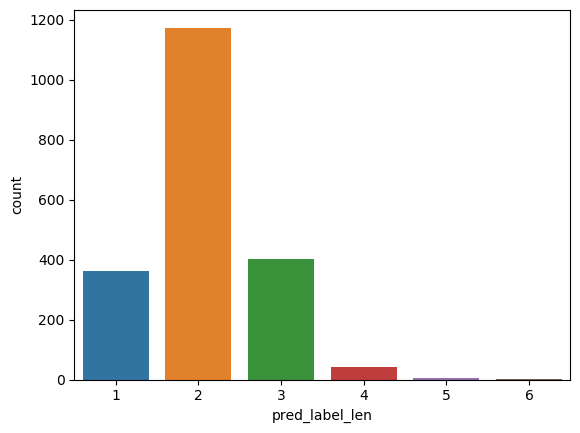

In [30]:
sns.countplot(df['pred_label_len'])
plt.show()

In [31]:
df.head()

,Unnamed: 0,ID,pred_label,Unnamed: 0.1,Unnamed: 0.1.1,tweet,labels,label_list,label_len,tweet_len,clean_tweets,tokens,neg,neu,pos,compound,pred_label_list,pred_label_len
0,0,1337160614884552705t,Side-effect,5268,5268,Did you know that the new Pfizer COVID-19 vacc...,side-effect,['side-effect'],1,19,did you know that the new pfizer covid19 vacci...,"['know', 'new', 'pfizer', 'covid19', 'vaccine'...",0.000,0.887,0.113,0.2869,[side-effect],1
1,1,1355176268879306752t,Unnecessary Pharma Side-effect,510,510,@BBCBreaking 'Vaccinating' young people <40 (w...,pharma unnecessary,"['pharma', 'unnecessary']",2,45,bbcbreaking vaccinating young people 40 with 0...,"['bbcbreaking', 'vaccinating', 'young', 'peopl...",0.214,0.722,0.064,-0.7590,"[unnecessary, pharma, side-effect]",3
2,2,1287711540343431168t,Mandatory Rushed,4328,4328,@outsider63 @gemmaod1 This is about been force...,mandatory rushed,"['mandatory', 'rushed']",2,20,outsider63 gemmaod1 this is about been forced ...,"['outsider63', 'gemmaod1', 'forced', 'take', '...",0.234,0.766,0.000,-0.6369,"[mandatory, rushed]",2
3,3,1417661084715032578t,Side-effect Pharma,8380,8380,Search Results from the #VAERS Database 31y♂️#...,side-effect,['side-effect'],1,15,search results from the vaers database 31yneva...,"['search', 'results', 'vaers', 'database', '31...",0.000,1.000,0.000,0.0000,"[side-effect, pharma]",2
4,4,1337183965917097984t,Unnecessary Mandatory,9033,9033,@Moondoggie2020 @melanielynngrif @ABC They tes...,unnecessary,['unnecessary'],1,39,moondoggie2020 melanielynngrif abc they tested...,"['moondoggie2020', 'melanielynngrif', 'abc', '...",0.051,0.882,0.066,0.1531,"[unnecessary, mandatory]",2


In [35]:
df['label_list'].iloc[0]

['side-effect']

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

# Assuming df is your DataFrame, and 'label_list' and 'pred_label_list' are the columns with the actual and predicted labels
mlb = MultiLabelBinarizer()

# Fit the binarizer on the actual labels and transform both actual and predicted labels
y_true = mlb.fit_transform(df['label_list'])
y_pred = mlb.transform(df['pred_label_list'])

# Compute macro F1 score
macro_f1 = f1_score(y_true, y_pred, average='macro')
print('Macro F1 score:', macro_f1)

Macro F1 score: 0.5321185422979818


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:987: UserWarning: unknown class(es) ['access', 'age', 'conspiracy,', 'error', 'informed-consent', 'pharma,', 'rushed,', 'side-effect,', 'toxic,', 'trust'] will be ignored
  .format(sorted(unknown, key=str)))


In [37]:
mlb.classes_

array(['conspiracy', 'country', 'ineffective', 'ingredients', 'mandatory',
       'none', 'pharma', 'political', 'religious', 'rushed',
       'side-effect', 'unnecessary'], dtype=object)

In [38]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_true, y_pred, target_names=mlb.classes_))

              precision    recall  f1-score   support

  conspiracy       0.28      0.77      0.41        91
     country       0.26      0.92      0.40        39
 ineffective       0.43      0.86      0.58       342
 ingredients       0.42      0.76      0.54       114
   mandatory       0.46      0.88      0.60       155
        none       0.51      0.21      0.30       115
      pharma       0.58      0.81      0.68       258
   political       0.32      0.75      0.45       110
   religious       0.38      0.85      0.52        13
      rushed       0.51      0.91      0.65       298
 side-effect       0.76      0.86      0.81       764
 unnecessary       0.32      0.83      0.46       160

   micro avg       0.49      0.82      0.61      2459
   macro avg       0.43      0.78      0.53      2459
weighted avg       0.54      0.82      0.63      2459
 samples avg       0.53      0.82      0.62      2459



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
